### Dépendences
Modules, fichiers, chemins, etc...

In [1]:
using ClimateTools, Glob

# Fichiers Shapefiles + extraction polygones
shapefile_gcm = "/home/proy/.julia/dev/ClimateTools/test/data/SudQC_GCM.shp"
shapefile_agr = "/media/proy/HDD500GB/DATA/Shapefiles/zoneAgricoleQc15km.shp"

P_gcm = extractpoly(shapefile_gcm, n = 1) # extract 1st part
P_agr = extractpoly(shapefile_agr, n = 2) # extract 1st part

# Fichiers datasets
obs_files = glob("*tasmax*.nc", "/media/proy/HDD500GB/DATA/NRCAN/")
path_root_sim = "/media/proy/HDD500GB/DATA/CMIP5/"
ref_file = path_root_sim * "tasmax_day_IPSL-CM5A-MR_historical_r1i1p1_19500101-19991231.nc"
fut_file = path_root_sim * "tasmax_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc"

┌ Info: Recompiling stale cache file /home/proy/.julia/compiled/v1.1/ClimateTools/utzlb.ji for ClimateTools [4f4ee721-4970-5af2-8560-6c1d960e3231]
└ @ Base loading.jl:1184


"/media/proy/HDD500GB/DATA/CMIP5/tasmax_day_IPSL-CM5A-MR_rcp85_r1i1p1_20560101-21001231.nc"

### Chargement des données.
La fonction load crée une structure de type `ClimGrid`, une représentation en mémoire du fichier netCDF. Une approche **out of core** est aussi possible (expérimental).

In [2]:
obs = load(obs_files, "tasmax", poly=P_agr)
ref = load(ref_file, "tasmax", start_date=(1961, 01, 01), end_date=(1970, 12, 31, 23))
fut = load(fut_file, "tasmax", start_date=(2091, 01, 01), end_date=(2100, 12, 31, 23))

Loading files: 100%|████████████████████████████████████| Time: 0:00:28


ClimGrid struct with data:
   3-dimensional AxisArray{Float32,3,...} with axes:
    :lon, [-180.0, -177.5, -175.0, -172.5, -170.0, -167.5, -165.0, -162.5, -160.0, -157.5  …  155.0, 157.5, 160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5]
    :lat, [-90.0, -88.7324, -87.4648, -86.1972, -84.9296, -83.662, -82.3944, -81.1268, -79.8592, -78.5916  …  78.5916, 79.8592, 81.1268, 82.3944, 83.662, 84.9296, 86.1972, 87.4648, 88.7324, 90.0]
    :time, Union{Missing, DateTimeNoLeap}[DateTimeNoLeap(2091-01-01T12:00:00), DateTimeNoLeap(2091-01-02T12:00:00), DateTimeNoLeap(2091-01-03T12:00:00), DateTimeNoLeap(2091-01-04T12:00:00), DateTimeNoLeap(2091-01-05T12:00:00), DateTimeNoLeap(2091-01-06T12:00:00), DateTimeNoLeap(2091-01-07T12:00:00), DateTimeNoLeap(2091-01-08T12:00:00), DateTimeNoLeap(2091-01-09T12:00:00), DateTimeNoLeap(2091-01-10T12:00:00)  …  DateTimeNoLeap(2100-12-22T12:00:00), DateTimeNoLeap(2100-12-23T12:00:00), DateTimeNoLeap(2100-12-24T12:00:00), DateTimeNoLeap(2100-12-25T12:00:00

### Parenthèse : Multiple dispatch
Basé sur les types. Permets de spécialiser les fonctions pour une optimisation/maintenance plus facile.

In [3]:
function foo(x::Int)
    println("Int!")
end
    

foo (generic function with 1 method)

In [4]:
function foo(x::String)
    println("String!")
end

foo (generic function with 2 methods)

In [5]:
foo(2)

Int!


In [6]:
foo("salut")

String!


### Inspection des données

NRCAN - zone agricole

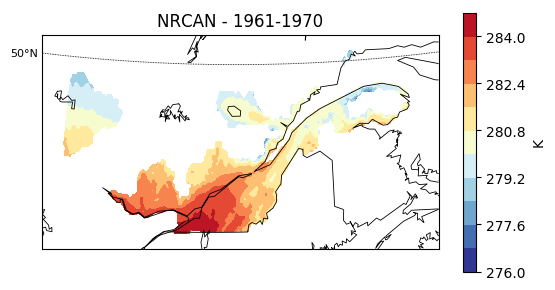

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd373559e10>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd36c1c0dd8>)

In [7]:
mapclimgrid(obs, region = "quebec_agricole", titlestr="NRCAN - 1961-1970")

Simulation **Ref**

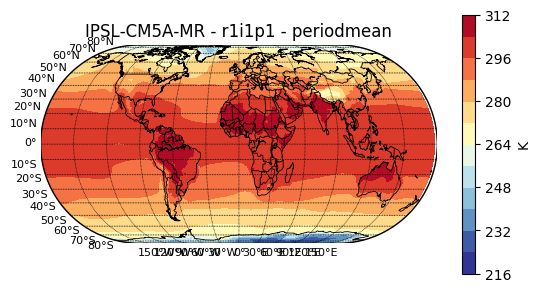

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd36c1ceb00>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd3400e9128>)

In [8]:
mapclimgrid(ref, region="worldeck4")

Simulation **fut**

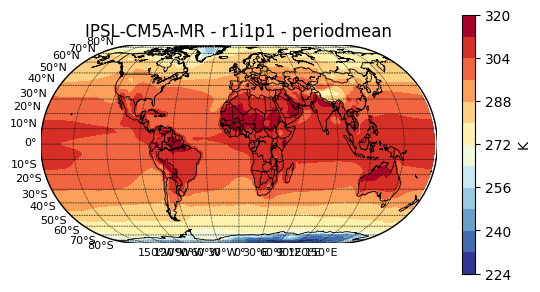

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd34004e5c0>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd33fbac8d0>)

In [9]:
mapclimgrid(fut, region = "worldeck4")

Delta entre **fut** et **ref**

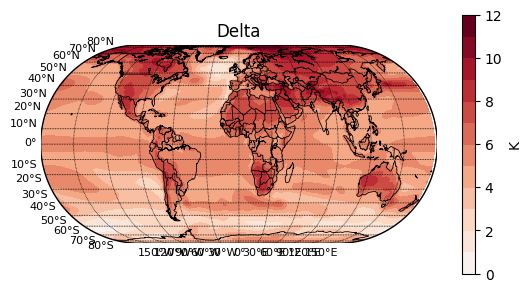

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd340308fd0>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd366353320>)

In [10]:
mapclimgrid(periodmean(fut) - periodmean(ref), region = "worldeck4", center_cs=true, titlestr="Delta")

## Interpolation (si nécessaire)
### Découpage
Considérant la région agricole, inutile de conserver l'ensemble du globe. La fonction `spatialsubset(ClimGrid, Polygone)` permet de couper la région sur le polygone.

In [11]:
ref = spatialsubset(ref, P_gcm)
fut = spatialsubset(fut, P_gcm)

ClimGrid struct with data:
   3-dimensional AxisArray{Float32,3,...} with axes:
    :lon, [-87.5, -85.0, -82.5, -80.0, -77.5, -75.0, -72.5, -70.0, -67.5, -65.0, -62.5, -60.0, -57.5]
    :lat, [38.0282, 39.2958, 40.5634, 41.831, 43.0986, 44.3662, 45.6338, 46.9014, 48.169, 49.4366, 50.7042, 51.9718, 53.2394, 54.507]
    :time, Union{Missing, DateTimeNoLeap}[DateTimeNoLeap(2091-01-01T12:00:00), DateTimeNoLeap(2091-01-02T12:00:00), DateTimeNoLeap(2091-01-03T12:00:00), DateTimeNoLeap(2091-01-04T12:00:00), DateTimeNoLeap(2091-01-05T12:00:00), DateTimeNoLeap(2091-01-06T12:00:00), DateTimeNoLeap(2091-01-07T12:00:00), DateTimeNoLeap(2091-01-08T12:00:00), DateTimeNoLeap(2091-01-09T12:00:00), DateTimeNoLeap(2091-01-10T12:00:00)  …  DateTimeNoLeap(2100-12-22T12:00:00), DateTimeNoLeap(2100-12-23T12:00:00), DateTimeNoLeap(2100-12-24T12:00:00), DateTimeNoLeap(2100-12-25T12:00:00), DateTimeNoLeap(2100-12-26T12:00:00), DateTimeNoLeap(2100-12-27T12:00:00), DateTimeNoLeap(2100-12-28T12:00:00), DateTimeNo

### Interpolation
Par défaut, inverse de la distance. Kriging et LocalWeightRegress disponible pour des estimateurs/analyses plus complexes. Dans le cas de la correction de biais, on prends l'estimateur le plus rapide.

In [12]:
ref = regrid(ref, obs)
fut = regrid(fut, obs)

Regridding: 100%|███████████████████████████████████████| Time: 0:11:05
Regridding: 100%|███████████████████████████████████████| Time: 0:10:59


ClimGrid struct with data:
   3-dimensional AxisArray{Float64,3,...} with axes:
    :lon, Float32[-79.5417, -79.4583, -79.375, -79.2917, -79.2083, -79.125, -79.0417, -78.9583, -78.875, -78.7917  …  -64.9583, -64.875, -64.7917, -64.7083, -64.625, -64.5417, -64.4583, -64.375, -64.2917, -64.2083]
    :lat, Float32[50.2917, 50.2083, 50.125, 50.0417, 49.9583, 49.875, 49.7917, 49.7083, 49.625, 49.5417  …  45.7083, 45.625, 45.5417, 45.4583, 45.375, 45.2917, 45.2083, 45.125, 45.0417, 44.9583]
    :time, Union{Missing, DateTimeNoLeap}[DateTimeNoLeap(2091-01-01T12:00:00), DateTimeNoLeap(2091-01-02T12:00:00), DateTimeNoLeap(2091-01-03T12:00:00), DateTimeNoLeap(2091-01-04T12:00:00), DateTimeNoLeap(2091-01-05T12:00:00), DateTimeNoLeap(2091-01-06T12:00:00), DateTimeNoLeap(2091-01-07T12:00:00), DateTimeNoLeap(2091-01-08T12:00:00), DateTimeNoLeap(2091-01-09T12:00:00), DateTimeNoLeap(2091-01-10T12:00:00)  …  DateTimeNoLeap(2100-12-22T12:00:00), DateTimeNoLeap(2100-12-23T12:00:00), DateTimeNoLeap(2100-1

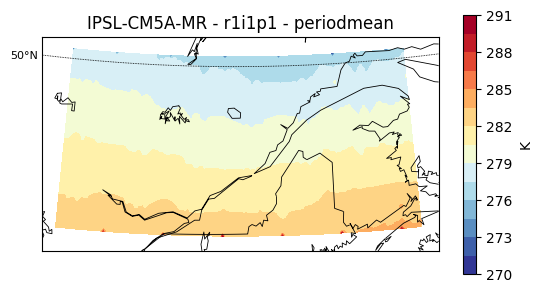

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd36c0efda0>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd340295400>)

In [13]:
mapclimgrid(ref, region="quebec_agricole")

### Correction de biais

In [14]:
qq_fut = qqmap(obs, ref, fut, method="additive")

ClimGrid struct with data:
   3-dimensional AxisArray{Float64,3,...} with axes:
    :lon, Float32[-79.5417, -79.4583, -79.375, -79.2917, -79.2083, -79.125, -79.0417, -78.9583, -78.875, -78.7917  …  -64.9583, -64.875, -64.7917, -64.7083, -64.625, -64.5417, -64.4583, -64.375, -64.2917, -64.2083]
    :lat, Float32[50.2917, 50.2083, 50.125, 50.0417, 49.9583, 49.875, 49.7917, 49.7083, 49.625, 49.5417  …  45.7083, 45.625, 45.5417, 45.4583, 45.375, 45.2917, 45.2083, 45.125, 45.0417, 44.9583]
    :time, DateTimeNoLeap[DateTimeNoLeap(2091-01-01T12:00:00), DateTimeNoLeap(2091-01-02T12:00:00), DateTimeNoLeap(2091-01-03T12:00:00), DateTimeNoLeap(2091-01-04T12:00:00), DateTimeNoLeap(2091-01-05T12:00:00), DateTimeNoLeap(2091-01-06T12:00:00), DateTimeNoLeap(2091-01-07T12:00:00), DateTimeNoLeap(2091-01-08T12:00:00), DateTimeNoLeap(2091-01-09T12:00:00), DateTimeNoLeap(2091-01-10T12:00:00)  …  DateTimeNoLeap(2100-12-22T12:00:00), DateTimeNoLeap(2100-12-23T12:00:00), DateTimeNoLeap(2100-12-24T12:00:00), 

### Inspection des résultats

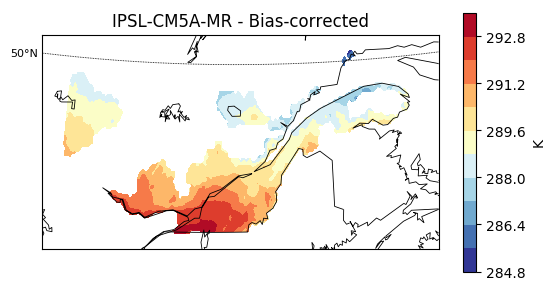

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd33ff25208>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd340339940>)

In [15]:
mapclimgrid(qq_fut, region="quebec_agricole", titlestr=string(qq_fut[3], " - Bias-corrected"))

### Effet de la correction de biais sur climato

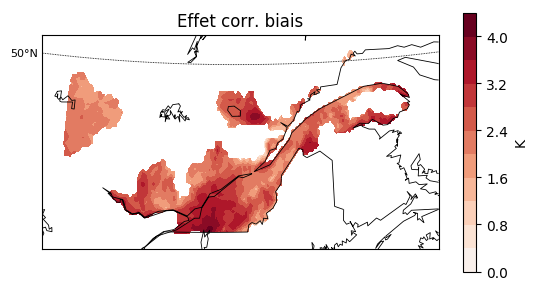

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd33fb53b00>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd33ffaf630>)

In [16]:
mapclimgrid(periodmean(qq_fut)-periodmean(fut), titlestr="Effet corr. biais", region="Quebec_agricole", center_cs=true)

Patron similaire à la différence entre **ref** et **obs** ...

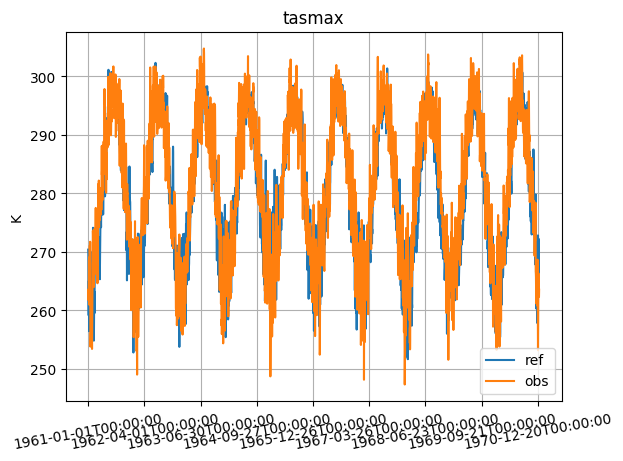

(true, PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7fd366090470>])

In [17]:
plot(ref, label="ref")
plot(obs, label="obs")

In [18]:
obs

ClimGrid struct with data:
   3-dimensional AxisArray{Float32,3,...} with axes:
    :lon, Float32[-79.5417, -79.4583, -79.375, -79.2917, -79.2083, -79.125, -79.0417, -78.9583, -78.875, -78.7917  …  -64.9583, -64.875, -64.7917, -64.7083, -64.625, -64.5417, -64.4583, -64.375, -64.2917, -64.2083]
    :lat, Float32[50.2917, 50.2083, 50.125, 50.0417, 49.9583, 49.875, 49.7917, 49.7083, 49.625, 49.5417  …  45.7083, 45.625, 45.5417, 45.4583, 45.375, 45.2917, 45.2083, 45.125, 45.0417, 44.9583]
    :time, Union{Missing, DateTime}[1961-01-01T00:00:00, 1961-01-02T00:00:00, 1961-01-03T00:00:00, 1961-01-04T00:00:00, 1961-01-05T00:00:00, 1961-01-06T00:00:00, 1961-01-07T00:00:00, 1961-01-08T00:00:00, 1961-01-09T00:00:00, 1961-01-10T00:00:00  …  1970-12-22T00:00:00, 1970-12-23T00:00:00, 1970-12-24T00:00:00, 1970-12-25T00:00:00, 1970-12-26T00:00:00, 1970-12-27T00:00:00, 1970-12-28T00:00:00, 1970-12-29T00:00:00, 1970-12-30T00:00:00, 1970-12-31T00:00:00]
And data, a 185×65×3652 Array{Float32,3}
Project: N

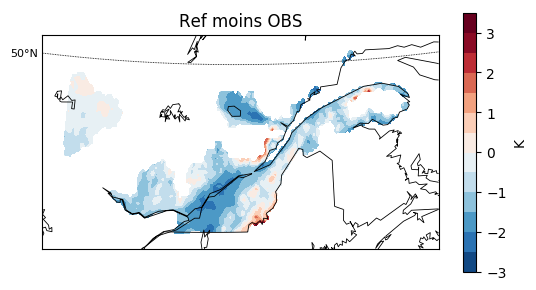

(true, PyPlot.Figure(PyObject <Figure size 640x480 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd366186f98>, PyObject <matplotlib.colorbar.Colorbar object at 0x7fd365d5a908>)

In [19]:
mapclimgrid(periodmean(ref) - periodmean(obs), region = "quebec_agricole", titlestr="Ref moins OBS", center_cs=true)

# En résumé

Au final, quelques commandes sont invoquées:

In [20]:
load(file, variable::String) #-> charge le/les fichiers en mémoire
regrid(A, B) #-> Mets les données de A sur la grille de B (si nécessaire)
qqfut = qqmap(obs, ref, fut, method, ...) # correction de biais
write(qqfut, "filename.nc") # exportation vers fichier netCDF

Ou dans une seule ligne de commande!

In [21]:
# Ou dans une seule ligne de commande si sur même grille
# write(qqmap(load(fileobs, "tasmax"), load(fileref, "tasmax"), load(filefut, "tasmax"), method="additive"), "output.nc")


## Documentation
### En ligne
https://balinus.github.io/ClimateTools.jl/stable/

### Dans le terminal Julia

In [22]:
?qqmap

search: qqmap qqmaptf



```
qqmap(obs::ClimGrid, ref::ClimGrid, fut::ClimGrid; method="Additive", detrend=true, window::Int=15, rankn::Int=50, thresnan::Float64=0.1, keep_original::Bool=false, interp::Function = Linear(), extrap::Function = Flat())
```

Quantile-Quantile mapping bias correction. For each julian day of the year (+/- **window** size), a transfer function is estimated through an empirical quantile-quantile mapping.

The quantile-quantile transfer function between **ref** and **obs** is etimated on a julian day (and grid-point) basis with a moving window around the julian day. Hence, for a given julian day, the transfer function is then applied to the **fut** dataset for a given julian day.

**Options**

**method::String = "Additive" (default) or "Multiplicative"**. Additive is used for most climate variables. Multiplicative is usually bounded variables such as precipitation and humidity.

**detrend::Bool = true (default)**. A 4th order polynomial is adjusted to the time series and the residuals are corrected with the quantile-quantile mapping.

**window::Int = 15 (default)**. The size of the window used to extract the statistical characteristics around a given julian day.

**rankn::Int = 50 (default)**. The number of bins used for the quantile estimations. The quantiles uses by default 50 bins between 0.01 and 0.99. The bahavior between the bins is controlled by the interp keyword argument. The behaviour of the quantile-quantile estimation outside the 0.01 and 0.99 range is controlled by the extrap keyword argument.

**thresnan::Float64 = 0.1 (default)**. The fraction is missing values authorized for the estimation of the quantile-quantile mapping for a given julian days. If there is more than **treshnan** missing values, the output for this given julian days returns NaNs.

**keep_original::Bool = false (default)**. If **keep_original** is set to true, the values are set to the original values in presence of too many NaNs.

**interp = Interpolations.Linear() (default)**. When the data to be corrected lies between 2 quantile bins, the value of the transfer function is linearly interpolated between the 2 closest quantile estimation. The argument is from Interpolations.jl package.

**extrap = Interpolations.Flat() (default)**. The bahavior of the quantile-quantile transfer function outside the 0.01-0.99 range. Setting it to Flat() ensures that there is no "inflation problem" with the bias correction. The argument is from Interpolation.jl package.

---

```
qqmap(obsvec::Array{N,1}, refvec::Array{N,1}, futvec::Array{N,1}, days, obs_jul, ref_jul, fut_jul; method::String="Additive", detrend::Bool=true, window::Int64=15, rankn::Int64=50, thresnan::Float64=0.1, keep_original::Bool=false, interp=Linear(), extrap=Flat())
```

Quantile-Quantile mapping bias correction for single vector. This is a low level function used by qqmap(A::ClimGrid ..), but can work independently.


Ce qui nous amène à l'outil "ligne de commande"...

https://gitlab.com/Balinus/juliabash

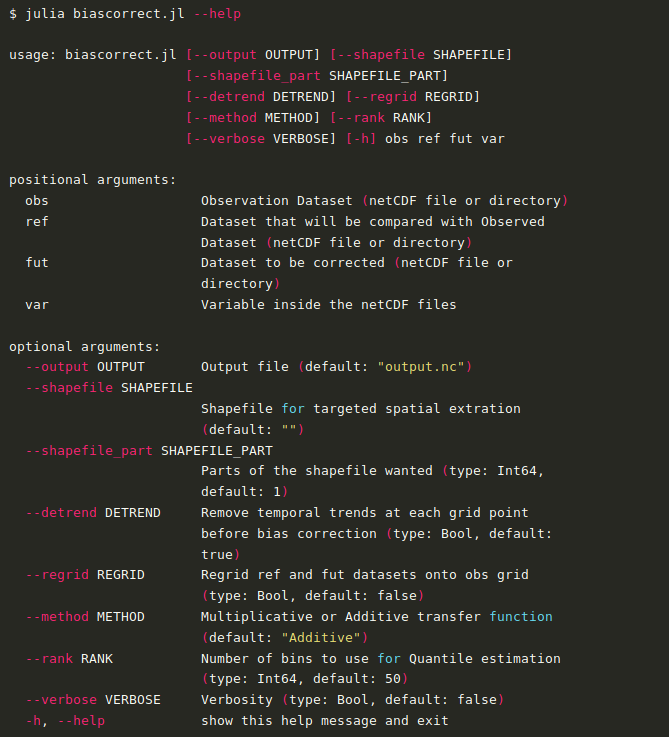

# Usage

**À partir du répertoire "src" pour des fichiers**

```bash
# Dans un terminal bash
$ julia biascorrect.jl obsdata.nc refdata.nc futdata.nc pr --method Multiplicative --detrend true --output myfile.nc
```

**Même appel si on a des *multifiles* datasets**

```bash
# Dans un terminal bash
$ julia biascorrect.jl path/to/obs_folder refdata.nc path/to/futfolder pr --method Multiplicative --detrend true --output myfile.nc
```

https://gitlab.com/Balinus/juliabash/blob/master/src/biascorrect.jl

## Prochaines étapes

* Faire une version **light** de ClimateTools
* Ajouter le subset temporel comme option
* Ajouter une options générations de figures pour fin d'analyse automatique
* L'optimisation de **qqmap** est pas mal terminée -> ~ 70ms pour corriger 30 ans, 1 point de grille 
* wrapper directement dans **xclim** est aussi une possibilité qui fonctionne

In [23]:
# Pour 30 ans de données
using BenchmarkTools
@benchmark $qqmap($obs, $ref, $fut)

# BenchmarkTools.Trial:
#   memory estimate:  28.56 MiB
#   allocs estimate:  39552
#   --------------
#   minimum time:     68.877 ms (2.49% GC)
#   median time:      71.037 ms (2.61% GC)
#   mean time:        77.866 ms (3.08% GC)
#   maximum time:     143.005 ms (1.25% GC)
#   --------------
#   samples:          65
#   evals/sample:     1

### Bonus: utilisation de Python
Même syntaxe que python. Exceptions :
* guillemets `'` => `"`
* importation `import xarray as xr` => `xr = pyimport("xarray")`

In [25]:
# Toujours dans un kernel Julia
using PyCall
xr = pyimport("xarray")


ds = xr.open_dataset(ref_file)

PyObject <xarray.Dataset>
Dimensions:    (bnds: 2, lat: 143, lon: 144, time: 18250)
Coordinates:
  * time       (time) object 1950-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat        (lat) float64 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tasmax     (time, lat, lon) float32 ...
Attributes:
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          historical
    source:                 IPSL-CM5A-MR (2010) : atmos : LMDZ4 (LMDZ4_v5, 14...
    model_id:               IPSL-CM5A-MR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    

### Sélection pas de temps

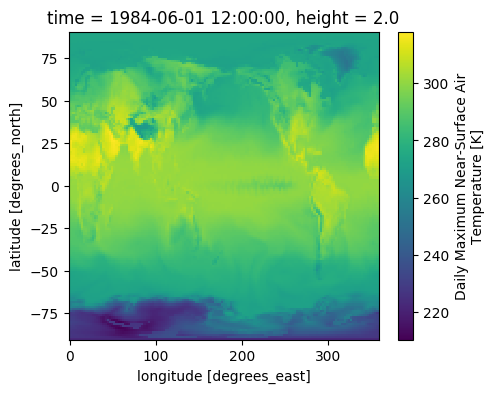

PyObject <matplotlib.collections.QuadMesh object at 0x7fd39b6c8be0>

In [35]:
ds.tasmax.sel(time="1984-06-01").plot(figsize=(5,4), aspect="equal")

### Amplitude max - min

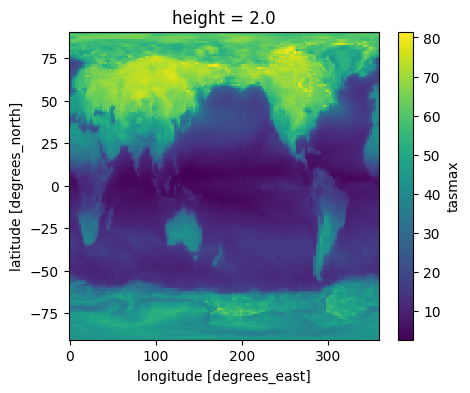

PyObject <matplotlib.collections.QuadMesh object at 0x7fd39b670898>

In [36]:
(ds.tasmax.max(dim="time") - ds.tasmax.min(dim="time")).plot(figsize=(5,4), aspect="equal")